In [18]:
import pandas as pd
df=pd.read_csv('/content/allremaining_dataset.csv')
df.head()

,review,rating
0,do not understand how it works,1
1,wont install,1
2,worse ai i ever chat,1
3,demands a phone number nope f off,1
4,very disgusting app,1


In [19]:
df['rating'].value_counts()


,count
rating,
5,89127
4,31759
3,13682
1,12825
2,8493


In [20]:
import pandas as pd
import numpy as np

# Original rating counts
original_counts = {
    1: 12825,
    2: 8493,
    3: 13682,
    4: 31759,
    5: 89127
}

# Total original ratings
total_original = sum(original_counts.values())

# Target percentages
target_percentages = {
    1: 0.10,
    2: 0.15,
    3: 0.20,
    4: 0.25,
    5: 0.30
}
target_counts = {rating: int(total_original * pct) for rating, pct in target_percentages.items()}
df_with_reviews = df[['review', 'rating']].copy()
resampled_data = []

for rating in range(1, 6):
    current_group = df_with_reviews[df_with_reviews["rating"] == rating]
    target_count = target_counts[rating]

    if target_count <= len(current_group):
        sampled = current_group.sample(target_count, random_state=42)
    else:
        sampled = current_group.sample(target_count, replace=True, random_state=42)

    resampled_data.append(sampled)
resampled_df = pd.concat(resampled_data).reset_index(drop=True)
print("New Rating Distribution:")
print(resampled_df["rating"].value_counts().sort_index())

New Rating Distribution:
rating
1    15588
2    23382
3    31177
4    38971
5    46765
Name: count, dtype: int64


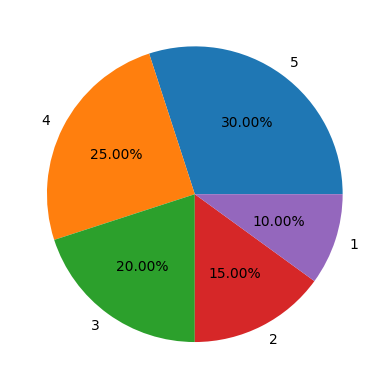

In [12]:


import matplotlib.pyplot as plt
plt.pie(resampled_df['rating'].value_counts(),labels=resampled_df['rating'].value_counts().index,autopct='%1.2f%%')
plt.show()


In [13]:
resampled_df['rating'].value_counts()


,count
rating,
5,46765
4,38971
3,31177
2,23382
1,15588


In [21]:

# Number of reviews to show per rating
n = 3

# Loop through ratings from 1 to 5
for rating in range(1, 6):
    # Filter reviews of the current rating
    filtered_reviews = resampled_df[resampled_df['rating'] == rating]['review'].dropna()

    # Sample 'n' reviews or all if fewer
    sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=rating)

    # Print the results
    print(f"\nShowing {min(n, len(filtered_reviews))} sample review(s) for Rating {rating}:\n")
    for i, review in enumerate(sample_reviews, 1):
        print(f"{i}. {review.strip()}\n")



Showing 3 sample review(s) for Rating 1:

1. cant even login without having chrome installed

2. even after paying for monthly subscription my chatgpt plus havent started and there is no support to reach out kindly check and revert

3. extreme usless app


Showing 3 sample review(s) for Rating 2:

1. average best overpriced read reviews nt know stayed beds raves sag middle good thing jr suite thier bed resturant high priced chicken sandwich not time hawaii fact time stayed ohau noisey lot large group meetings pools closed time carpet dirty feet socks got dirty whrn walked not stay recommend hotel friends

2. six

3. mostly side effects of loose stools and diarea


Showing 3 sample review(s) for Rating 3:

1. pretty good visit arrived couple days labor day long weekend lots spare rooms floor like penthouseexpensive thoughsmall bathroom sink actually outside room weirdfree internetok service ok breakfast average location average cleanness

2. even the premium version can be quite slow w

In [23]:
resampled_df.to_csv('imbalanced_dataset.csv', index=False)